# Introduction

In part 1 of this assessment, you will complete several requested SQL queries in order to extract data, analyze, and provide insights from a single provided SQL database. You will also visualize the key results of 3 of these queries. There are also several 'Reflection' questions that ask you to write out a text based answer in the provided markdown cell. Following the guided question and answer section, in part 2 you will explore a second dataset on your own using SQL in order to conduct a preliminary analysis. You will be asked to produce a very short slide presentation highlighting the work you did for this second section.

## Objectives
You will be able to:
- Interpret "word problems" and translate them into SQL queries
- Decide and perform whichever type of JOIN is best for retrieving desired data
- Use GROUP BY statements to apply aggregate functions like COUNT, MAX, MIN, and SUM
- Use the HAVING clause to compare different aggregates
- Write subqueries to decompose complex queries
- Visualize data using matplotlib, seaborn, or pandas
- Choose the correct chart type based on the given data


## Part 1: Guided SQL Queries

### Your Task: Querying a Customer Database

![toy car picture](images/toycars.jpg)


### Business Understanding
Your employer sells wholesale miniature models of products such as classic cars, motorcycles, and planes. They want you to pull several reports on different segments of their past customers, in order to better understand past sales as well as determine which customers will receive promotional material. They are also interested in investigating which products have performed the best, as well as having several smaller asks.

In addition to providing the requested data from the SQL database you have also been asked to create some basic visuals to display some of the more insightful information. It is up to your discretion to choose the correct plot/chart type for the data in question. **Questions that want you to visualize the results will be explicitly marked**.

### Data Understanding
You may remember this database from a previous lab. As a refresher, here's the ERD diagram for this database:

![ERD picture](images/ERD.png)

The queries you are asked to write will become more complex over the course of the lab.



### Getting Started
For this assessment you are expected to make use of both sqlite3 and the Pandas libraries in order to write, execute, and return SQL queries as a Pandas DataFrame. Assign each returned answer as its own explicit variable.

For the visualization piece you are expected to utilize either Pandas, Seaborn, or Matplotlib to create your visuals. Make sure you are providing verbose labels and titles according to the data you are being asked to visualize. Do not worry too much about choosing a 'style' or 'context' instead focus on conveying the requested information correctly.

### Step 1: Connect to Data

In the cell below
- Import the necessary libraries
- Establish a connection to the database data.sqlite

In [1]:
# Replace None with your code
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Create connection to database
conn = sqlite3.connect('data.sqlite')

### Step 2: Limited Edition California Product
The California sales rep team is interested in running promotional material for a new limited edition model they are releasing based on the famous San Francisco Cable Cars. This product will only be available to customer stores based in California and given its high price value they want to first target promotional material to existing California customers with a high credit limit. Upon communicating with the accounting department, a credit limit of over 25,000 is considered to be high. 

Execute a SQl query that returns which customers the sales rep team wants to market to first.

In [2]:
# Replace None with your code
query = """
SELECT customerName, contactLastName, contactFirstName, phone, city, creditLimit
FROM customers
WHERE state = 'CA' and creditLimit > 25000
ORDER BY creditLimit DESC;"""

ca_cust = pd.read_sql(query, conn)
ca_cust

,customerName,contactLastName,contactFirstName,phone,city,creditLimit
0,Toys4GrownUps.com,Young,Julie,6265557265,Pasadena,90700.00
1,Technics Stores Inc.,Hashimoto,Juri,6505556809,Burlingame,84600.00
2,The Sharp Gifts Warehouse,Frick,Sue,4085553659,San Jose,77600.00
3,Mini Wheels Co.,Murphy,Julie,6505555787,San Francisco,64600.00
4,Signal Collectibles Ltd.,Taylor,Sue,4155554312,Brisbane,60300.00
5,"Men 'R' US Retailers, Ltd.",Chandler,Brian,2155554369,Los Angeles,57700.00
6,West Coast Collectables Co.,Thompson,Steve,3105553722,Burbank,55400.00
7,Mini Gifts Distributors Ltd.,Nelson,Susan,4155551450,San Rafael,210500.00
8,Boards & Toys Co.,Young,Mary,3105552373,Glendale,11000.00
9,Collectable Mini Designs Co.,Thompson,Valarie,7605558146,San Diego,105000.00


### Step 3: International Collectable Campaign

The international sales rep team has reached out to you to help them identify partners for a 'Collectable' marketing campaign that highlights the potential collectors value in purchasing these model kits. They want to try and promote a 'collect them all' mentality. The team had a great idea to partner with any of their international customers (non-US) who have "Collect" in their name as a tie in to the larger theme.

Execute a SQL that returns the customers in question.

In [3]:
# Replace None with your code
query = """
SELECT customerName, contactLastName, contactFirstName, phone, city, country
FROM customers
WHERE country != 'USA' AND customerName LIKE '%Collect%'
ORDER BY country, customerName;
"""

collect_cust = pd.read_sql(query, conn)
collect_cust

,customerName,contactLastName,contactFirstName,phone,city,country
0,"Australian Collectables, Ltd",Clenahan,Sean,61-9-3844-6555,Glen Waverly,Australia
1,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,Melbourne,Australia
2,Salzburg Collectables,Pipps,Georg,6562-9555,Salzburg,Austria
3,"Royal Canadian Collectables, Ltd.",Lincoln,Elizabeth,(604) 555-4555,Tsawassen,Canada
4,Heintze Collectables,Ibsen,Palle,86 21 3555,Århus,Denmark
5,Reims Collectables,Henriot,Paul,26.47.1555,Reims,France
6,"Bavarian Collectables Imports, Co.",Donnermeyer,Michael,+49 89 61 08 9555,Munich,Germany
7,Stuttgart Collectable Exchange,Müller,Rita,0711-555361,Stuttgart,Germany
8,"King Kong Collectables, Co.",Gao,Mike,+852 2251 1555,Central Hong Kong,Hong Kong
9,"Clover Collections, Co.",Cassidy,Dean,+353 1862 1555,Dublin,Ireland


## Reflection Question:

Describe the WHERE clause you used in the above query to a non-technical manager who wants to be ensured that you are properly filtering and only selecting the requested data. How is the operator and conditional expression you are using acting to accomplish this?

## Type your answer in markdown here!

The WHERE clause was used to filter by country, only showing those that are not USA. Another condition filtered on was having the word "collect" in the name of the business.

### Step 4: USA Credit and Inventory Policy - Visual Required
The USA based product team is planning to adjust its credit policies and inventory allocation strategy based on the average credit limit of its customers. They would like to target this strategy at a state level with several goals in mind. 
1. Optimize inventory distribution:
    - States with higher average credit limits might be able to place larger orders, justifying priority in inventory allocation.
    - This could help ensure that states with more purchasing power always have products in stock.
2. Tailor credit policies:
    - Adjust credit limits for new customers based on the state average.
    - Identify states where they might be too conservative or too liberal with credit limits.
3. Target marketing and sales efforts:
    - Focus promotional campaigns on states with higher credit limits, potentially leading to larger orders.
    - Develop strategies to increase sales in states with lower average credit limits.

Execute a SQl query that returns the information required to address this ask.

In [4]:
# Replace None with your code
query = """
SELECT state, 
COUNT(customerNumber) AS number_of_customers,
AVG(creditLimit) AS avg_credit_limit,
SUM(creditLimit) AS total_credit_limit
FROM customers
WHERE country = 'USA' AND state IS NOT NULL
GROUP BY state
ORDER by avg_credit_limit DESC
"""

us_credit_by_state = pd.read_sql(query, conn)
us_credit_by_state

,state,number_of_customers,avg_credit_limit,total_credit_limit
0,NH,1,114200.000000,114200.0
1,NY,6,89966.666667,539800.0
2,PA,3,84766.666667,254300.0
3,CA,11,83854.545455,922400.0
4,NV,1,71800.000000,71800.0
5,MA,9,70755.555556,636800.0
6,CT,4,57350.000000,229400.0
7,NJ,1,43000.000000,43000.0


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

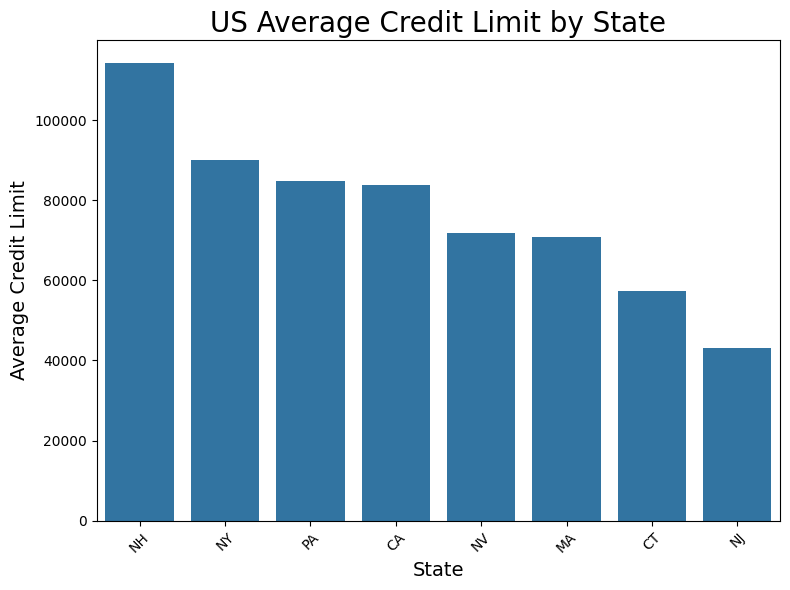

In [5]:
# Replace None with your visual code
# Produce a visual to represent the average credit limit by state
plt.figure(figsize=(8, 6))
sns.barplot(x = 'state', y = 'avg_credit_limit', data= us_credit_by_state, order = us_credit_by_state.sort_values('avg_credit_limit', ascending=False)['state'])
plt.title('US Average Credit Limit by State', fontsize = 20)
plt.xlabel('State', fontsize = 14)
plt.ylabel('Average Credit Limit', fontsize = 14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Step 5: Top Customers - Visual Required
The company is approaching its 10 year anniversary and wants to acknowledge and thank its top customers with personalized communication. They have asked you to determine the top 10 customers based on the total amount of payments made, making sure to return the customer name for clarity. 

Execute a SQl query that returns the information required to address this ask.


In [6]:
# Replace None with your code
query = """
SELECT customerName, contactLastName, contactFirstName, SUM(amount) AS total_payments
FROM customers
JOIN payments on customers.customerNumber = payments.customerNumber
GROUP BY customers.customerNumber
ORDER BY total_payments DESC
LIMIT 10;
"""

top_customers = pd.read_sql(query, conn)
top_customers

,customerName,contactLastName,contactFirstName,total_payments
0,Euro+ Shopping Channel,Freyre,Diego,715738.98
1,Mini Gifts Distributors Ltd.,Nelson,Susan,584188.24
2,"Australian Collectors, Co.",Ferguson,Peter,180585.07
3,Muscle Machine Inc,Young,Jeff,177913.95
4,"Dragon Souveniers, Ltd.",Natividad,Eric,156251.03
5,"Down Under Souveniers, Inc",Graham,Mike,154622.08
6,"AV Stores, Co.",Ashworth,Rachel,148410.09
7,"Anna's Decorations, Ltd",O'Hara,Anna,137034.22
8,Corporate Gift Ideas Co.,Brown,Julie,132340.78
9,"Saveley & Henriot, Co.",Saveley,Mary,130305.35


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

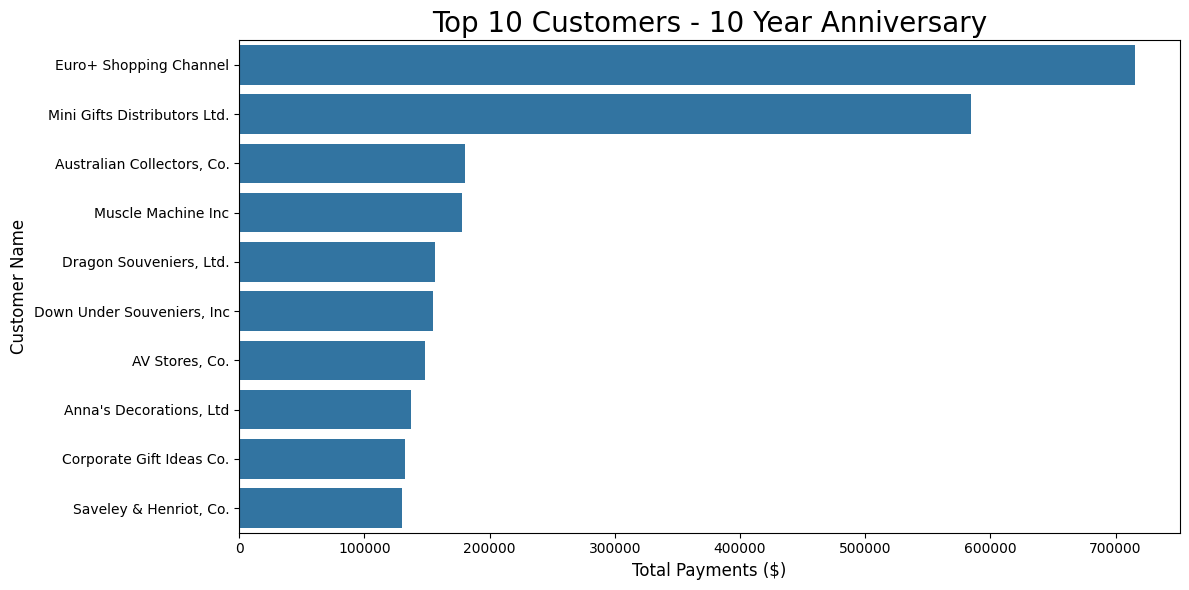

In [7]:
# Replace None with your visual code
# Produce a visual to represent the top ten customers in terms of total payments
plt.figure(figsize=(12, 6))
sns.barplot(x = 'total_payments', y = 'customerName', data = top_customers)
plt.title('Top 10 Customers - 10 Year Anniversary', fontsize = 20)
plt.xlabel('Total Payments ($)', fontsize = 12)
plt.ylabel('Customer Name', fontsize = 12)
plt.tight_layout()
plt.show()

### Step 6: Top Customer + Product Quantities
The product team is running an analysis on popular and common products sold to each customer in order to try and determine what new products they should be looking at to include in their catalog. This data will also be used by individual sales reps to recommend similar products to each customer next time they place an order. 

They have asked you to query information, for each customer, about any product they have purchased 10 or more units of. In addition they would like the full set of data to be sorted in ascending order by the total amount purchased.

Execute a SQl query that returns the information required to address this ask.

Hint: For this one, you'll need to make use of HAVING, GROUP BY, and ORDER BY — make sure you get the order of them correct!

In [8]:
# Replace None with you code
query = """
SELECT customerName, productName, productLine, SUM(quantityOrdered) AS total_units_purch
FROM customers
JOIN orders ON customers.customerNumber = orders.customerNumber
JOIN orderDetails ON orders.orderNumber = orderDetails.orderNumber
JOIN products ON orderdetails.productCode = products.productCode
GROUP BY customers.customerNumber, products.productCode
HAVING total_units_purch >= 10
ORDER BY total_units_purch ASC;
"""

top_cust_product_quantities = pd.read_sql(query, conn)
top_cust_product_quantities

,customerName,productName,productLine,total_units_purch
0,Petit Auto,1913 Ford Model T Speedster,Vintage Cars,10
1,"Extreme Desk Decorations, Ltd",1961 Chevrolet Impala,Classic Cars,10
2,La Rochelle Gifts,1954 Greyhound Scenicruiser,Trucks and Buses,11
3,Tekni Collectables Inc.,American Airlines: B767-300,Planes,11
4,The Sharp Gifts Warehouse,1969 Chevrolet Camaro Z28,Classic Cars,13
...,...,...,...,...
2526,Euro+ Shopping Channel,2002 Chevy Corvette,Classic Cars,174
2527,Euro+ Shopping Channel,1957 Chevy Pickup,Trucks and Buses,183
2528,Euro+ Shopping Channel,1970 Dodge Coronet,Classic Cars,197
2529,Euro+ Shopping Channel,1958 Chevy Corvette Limited Edition,Classic Cars,245


### Step 7: Product Analysis - Visual Required

The product team is looking into the demand across its different product lines. They are conducting a comprehensive review of its product portfolio and inventory management strategies. You have been asked to query data pertaining to each different product line, that contains the total quantity ordered and the total number of products for each respective product line. By examining the number of products and total quantity ordered for each product line, the company aims to:
1. Optimize product mix:
    - Identify which product lines have the most diverse offerings (high number of products)
    - Determine which lines are most popular (high total quantity ordered)
    - Compare if lines with more products necessarily lead to more orders
2. Improve inventory management:
    - Adjust stock levels based on the popularity of each product line
    - Identify potential overstocking in lines with low order quantities
    - Ensure adequate variety in high-performing product lines
3. Adjust marketing strategy:
    - Focus promotional efforts on product lines with high potential (many products but lower order quantities)
    - Capitalize on the popularity of high-performing lines in marketing campaigns
4. Advise Product development:
    - Invest in expanding product ranges for lines with high order quantities
    - Consider phasing out or revamping product lines with low numbers of products and low order quantities

Hint: Think about how you can and might have to utilize SQL DISTINCT statement

Execute a SQl query that returns the information required to address this ask.

In [9]:
# Replace None with your code
query = """ 
SELECT productLine, 
COUNT(DISTINCT products.productCode) AS number_of_products,
SUM(quantityOrdered) as total_quantity_ordered
FROM products
JOIN orderDetails ON products.productCode = orderDetails.productCode
GROUP BY productLine
ORDER BY total_quantity_ordered DESC;"""

product_lines = pd.read_sql(query, conn)
product_lines

,productLine,number_of_products,total_quantity_ordered
0,Classic Cars,37,35582
1,Vintage Cars,24,22933
2,Motorcycles,13,12778
3,Planes,12,11872
4,Trucks and Buses,11,11001
5,Ships,9,8532
6,Trains,3,2818


Once you have the information returned in a dataframe, select an appropriate visualization to represent the relationship between total quantity ordered and the number of products in order to perform a preliminary investigation into the question of if more products lead to more orders. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

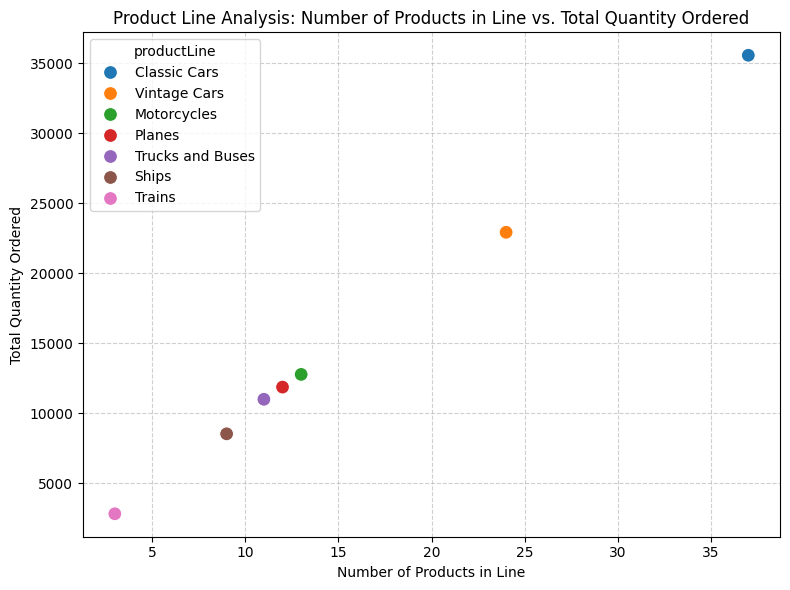

In [10]:
# Replace None with your visual code
# Produce a visual to represent the the relation between number of products and the total amount ordered
plt.figure(figsize=(8, 6))
sns.scatterplot(data = product_lines, x = 'number_of_products', y = 'total_quantity_ordered', hue= 'productLine', s=100)
plt.title('Product Line Analysis: Number of Products in Line vs. Total Quantity Ordered')
plt.xlabel('Number of Products in Line')
plt.ylabel('Total Quantity Ordered')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Reflection Question:

Please explain your choice in the type of visual you used in order to highlight and represent the data from the above query. In a non-technical manner explain why that chart type makes sense for the information being conveyed. What does this visual convey in the context of the question it was asked for?

## Type your answer in markdown here!

A scatterplot was chosen for its simplicity in illustrating the relationship between number of products in each product line and total quantity ordered. Each colored dot on the chart represents one of the seven product lines and how they compare to other lines in regard to number of products in each line and total quantity ordered. Seeing the data illustrated this way makes it clear that the more products a product line offers the higher the quantity sold. This data is helpful in determining the inventory allocation for each product/line. Thus optimizing turnover rate and overall profitability.

### Step 8: Remote Offices
Upper management is considering a shift to hybrid and remote work for certain locations and roles. They have tasked you with providing them data about employees who work in any office that has fewer than 5 total employees so they can better understand how to support those employees remotely when offices are shut down. 

Be sure to include information about the employees job and supervisor so management can adjust everyone to remote work properly.

Hint: Utilize a subquery to find the relevant offices

Execute a SQl query that returns the information required to address this ask.

In [11]:
# Replace None with your code
query = """
SELECT e.firstName, e.lastName, o.city AS OfficeLocation, e.jobTitle, CONCAT(m.firstName, ' ', m.lastName) AS supervisorName
FROM employees AS e
JOIN offices AS o USING(officeCode)
LEFT JOIN employees m ON e.reportsTo = m.employeeNumber
WHERE e.officeCode IN (
    SELECT officeCode
    FROM employees
    GROUP BY officeCode
    HAVING COUNT(*) < 5)
ORDER BY e.officeCode, e.lastName, e.firstName;
"""

office_analysis = pd.read_sql(query,conn)
office_analysis


,firstName,lastName,OfficeLocation,jobTitle,supervisorName
0,Julie,Firrelli,Boston,Sales Rep,Anthony Bow
1,Steve,Patterson,Boston,Sales Rep,Anthony Bow
2,Foon Yue,Tseng,NYC,Sales Rep,Anthony Bow
3,George,Vanauf,NYC,Sales Rep,Anthony Bow
4,Yoshimi,Kato,Tokyo,Sales Rep,Mami Nishi
5,Mami,Nishi,Tokyo,Sales Rep,Mary Patterson
6,Andy,Fixter,Sydney,Sales Rep,William Patterson
7,Tom,King,Sydney,Sales Rep,William Patterson
8,Peter,Marsh,Sydney,Sales Rep,William Patterson
9,William,Patterson,Sydney,Sales Manager (APAC),Mary Patterson


## Reflection Question:

Describe how you decided on the subquery that you used in the query above? This answer can be technically in nature, describing your thought process in how the main query is utilizing the subquery to return the correct data.

## Type your answer in markdown here!

I decided on the subquery to narrow the results down to offices that have less than five total employees. Placing the sub-query as the WHERE clause in the main query helped narrow down the results, thus being in line with what management wanted reported.

### Step 9: Close the Connection

Now that you are finished executing your queries and retrieving the required information you always want to make sure to close the connection to your database.

In [12]:
# Replace None with your code
conn.close()

### End of Guided Section
In this initial portion of the assessment, you produced several data queries and visualizations for a model company, mainly focused around its customer and product data. You wrote and engineered specific SQL queries to address pertinent questions and asks from the company. Along the way, you utilized many of the major concepts and keywords associated with SQL SELECT queries: FROM, WHERE, GROUP BY, HAVING, ORDER BY, JOIN, SUM, COUNT, and AVG.

## Part 2: Exploratory Analysis with SQL
In this open-ended exploratory section, you will analyze real-world data from the movie industry. As a data analyst, you have the freedom to investigate questions and topics that intrigue you within this dataset. The database schema and Entity-Relationship Diagram (ERD) are provided below for your reference. A general overview and instructions are also provided below.

In [47]:
# Run this cell without changes
import zipfile

zip_file_path = 'im.db.zip'
extract_to_path = './'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

# Connection
conn4 = sqlite3.connect('im.db')

# Schema
schema_df = pd.read_sql("""
SElECT * FROM sqlite_master                        
""", conn4)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


## The Data

![movie ERD](images/movie_data_erd.jpeg)
### Database Content:

- Source: IMDB
- Time Range: Movies released between 2010 and 2019
- Note: Exclude any movies with a start_year after 2019 as this data is not current or accurate

Available Data Categories:
- Genre
- Runtime
- Personnel (writers, directors, actors)
- Movie ratings

### Objectives:

Initial Exploration:
- Use SQL in combination with Pandas to explore the database
- Identify interesting trends, patterns, or relationships in the data

Business Question Formulation:
- Develop at least one substantial business question for deeper analysis
- Ensure the question is relevant, specific, and can be addressed with the available data

Data Cleaning Assessment:
- Identify potential data cleaning tasks necessary for your deeper analysis
- Note: You are not required to perform the cleaning, only to recognize and list the necessary tasks

Null Value Handling:
- Be aware that the dataset contains null values in certain fields
- Exclude these null values from your exploration
- Do not attempt to input or fill in missing information

### Deliverables:

You need to produce a short slide presentation (3-5 slides) that highlights the three key deliverables below. Utilize a data visualization to support the second deliverable.

1. A summary of your initial data exploration findings
    - Can be bulleted or sentence form
2. At least one well-formulated business question for further analysis
    - Should stem from a relevant trend or pattern your initial exploration identified
3. A list of potential data cleaning tasks identified during your exploration
    - This can and should include things like data normalization/standardization and null handling

Tips for Success:

Begin with broad exploratory queries to understand the data's scope and content. Then focus on honing in on interesting relationships between different data categories. Consider industry trends, audience preferences, or financial aspects when formulating your business question. Pay attention to data quality issues, inconsistencies, or limitations that might affect your analysis. Remember, the goal is to demonstrate your analytical thinking and ability to derive meaningful insights from complex datasets. Good luck with your exploration!

NOTE: You do not need to explore every aspect of this database. Find something that you think is interesting or relevant about the data and focus your exploration there.

## TABLE ANALYSIS

In [31]:
principals_df = pd.read_sql("""SELECT * FROM principals;""", conn4)
persons_df = pd.read_sql("""SELECT * FROM persons;""", conn4)
known_for_df = pd.read_sql("""SELECT * FROM known_for;""", conn4)
directors_df = pd.read_sql("""SELECT * FROM directors;""", conn4)
writers_df = pd.read_sql("""SELECT * FROM writers;""", conn4)
movie_basics_df = pd.read_sql("""SELECT * FROM movie_basics;""", conn4)
movie_ratings_df = pd.read_sql("""SELECT * FROM movie_ratings;""", conn4)
movie_akas_df = pd.read_sql("""SELECT * FROM movie_akas;""", conn4)

In [32]:
def analyze_df(df_name, rows):
    print("--------------------DataFrame Info----------------------\n")
    df_name.info()
    print("--------------------First {} Rows-----------------------".format(rows))
    print(df_name.head(rows))


def row_counts_by_table(tables, connection):
    table_counts = pd.DataFrame({
        'table': tables,
        'rows': [pd.read_sql(f"SELECT COUNT(*) AS n FROM {t};",connection)['n'][0] for t in tables]    
    }).sort_values('rows', ascending=False)
    return table_counts

In [33]:
tables = ['movie_basics','movie_ratings','directors','writers','principals','persons','known_for','movie_akas']

table_counts = row_counts_by_table(tables,conn4)
table_counts

,table,rows
6,known_for,1638260
4,principals,1028186
5,persons,606648
7,movie_akas,331703
2,directors,291174
3,writers,255873
0,movie_basics,146144
1,movie_ratings,73856


In [34]:
principals = analyze_df(principals_df, 10)

--------------------DataFrame Info----------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB
--------------------First 10 Rows-----------------------
    movie_id  ordering  person_id  category       job  \
0  tt0111414         1  nm0246005     actor      None   
1  tt0111414         2  nm0398271  director      None   
2  tt0111414         3  nm3739909  producer  producer   
3  tt0323808        10  nm0059247    editor      None   
4  tt0323808         1  nm3579312   actress      None   
5  tt0323808         2  nm2694680     actor 

In [35]:
persons = analyze_df(persons_df, 10)

--------------------DataFrame Info----------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB
--------------------First 10 Rows-----------------------
   person_id       primary_name  birth_year  death_year  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN   
1  nm0061865       Joseph Bauer         NaN         NaN   
2  nm0062070         Bruce Baum         NaN         NaN   
3  nm0062195       Axel Baumann         NaN         NaN   
4  nm0062798        Pete Baxter         NaN         NaN   
5  nm0062879     R

In [36]:
known_for = analyze_df(known_for_df, 10)

--------------------DataFrame Info----------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB
--------------------First 10 Rows-----------------------
   person_id   movie_id
0  nm0061671  tt0837562
1  nm0061671  tt2398241
2  nm0061671  tt0844471
3  nm0061671  tt0118553
4  nm0061865  tt0896534
5  nm0061865  tt6791238
6  nm0061865  tt0287072
7  nm0061865  tt1682940
8  nm0062070  tt1470654
9  nm0062070  tt0363631


In [37]:
directors = analyze_df(directors_df, 10)

--------------------DataFrame Info----------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB
--------------------First 10 Rows-----------------------
    movie_id  person_id
0  tt0285252  nm0899854
1  tt0462036  nm1940585
2  tt0835418  nm0151540
3  tt0835418  nm0151540
4  tt0878654  nm0089502
5  tt0878654  nm2291498
6  tt0878654  nm2292011
7  tt0879859  nm2416460
8  tt0996958  nm2286991
9  tt0996958  nm2286991


In [38]:
writers = analyze_df(writers_df, 10)

--------------------DataFrame Info----------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB
--------------------First 10 Rows-----------------------
    movie_id  person_id
0  tt0285252  nm0899854
1  tt0438973  nm0175726
2  tt0438973  nm1802864
3  tt0462036  nm1940585
4  tt0835418  nm0310087
5  tt0835418  nm0841532
6  tt0878654  nm0284943
7  tt0878654  nm0284943
8  tt0878654  nm0284943
9  tt0996958  nm2286991


In [39]:
movie_basics = analyze_df(movie_basics_df, 10)

--------------------DataFrame Info----------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
--------------------First 10 Rows-----------------------
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                 

In [40]:
movie_ratings = analyze_df(movie_ratings_df, 10)

--------------------DataFrame Info----------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
--------------------First 10 Rows-----------------------
     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21
5   tt1069246            6.2       326
6   tt1094666            7.0      1613
7   tt1130982            6.4       571
8   tt1156528            7.2       265
9   tt1161457            4.2       148


In [41]:
movie_akas = analyze_df(movie_akas_df, 10)

--------------------DataFrame Info----------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB
--------------------First 10 Rows-----------------------
    movie_id  ordering                                    title region  \
0  tt0369610        10                            Джурасик свят     BG   
1  tt0369610        11                        Jurashikku warudo     JP   


## Principals Categories

In [42]:
principals_category = principals_df['category'].value_counts()
principals_category

category
actor                  256718
director               146393
actress                146208
producer               113724
cinematographer         80091
composer                77063
writer                  74357
self                    65424
editor                  55512
production_designer      9373
archive_footage          3307
archive_sound              16
Name: count, dtype: int64

In [43]:
actor_count = principals_df[principals_df['category'] == 'actor']['person_id'].nunique()
director_count = principals_df[principals_df['category'] == 'director']['person_id'].nunique()
actress_count = principals_df[principals_df['category']  == 'actress']['person_id'].nunique()
producer_count = principals_df[principals_df['category'] == 'producer']['person_id'].nunique()
cinematographer_count = principals_df[principals_df['category'] == 'cinematographer']['person_id'].nunique()
composer_count = principals_df[principals_df['category'] == 'composer']['person_id'].nunique()
writer_count = principals_df[principals_df['category'] == 'writer']['person_id'].nunique()
editor_count = principals_df[principals_df['category']  == 'editor']['person_id'].nunique()

print(f"Unique Actors: {actor_count}")
print(f"Unique Directors: {director_count}")
print(f"Unique Actresses: {actress_count}")
print(f"Unique Producers: {producer_count}")
print(f"Unique Cinematographers: {cinematographer_count}")
print(f"Unique Composers: {composer_count}")
print(f"Unique Writers: {writer_count}")
print(f"Unique Editors: {editor_count}")

Unique Actors: 157948
Unique Directors: 99399
Unique Actresses: 88717
Unique Producers: 67956
Unique Cinematographers: 44693
Unique Composers: 43007
Unique Writers: 53765
Unique Editors: 31534


## BUSINESS QUESTION

What is the relationship between runtime and rating? We are only analyzing titles that are categorized with one genre.

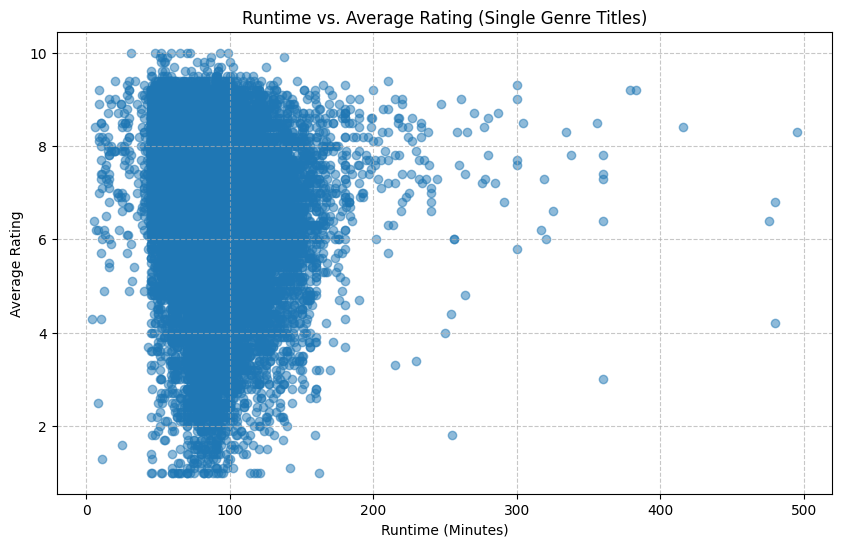

In [49]:
runtime_rating_df = pd.read_sql("""
    SELECT mb.runtime_minutes, mr.averagerating
    FROM movie_basics mb
    INNER JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
    WHERE
        mb.genres IS NOT NULL AND mb.genres != '' 
        AND mb.genres NOT LIKE '%,%' 
        AND mb.runtime_minutes IS NOT NULL AND mr.averagerating IS NOT NULL 
        AND mb.runtime_minutes < 500
""", conn4)

plt.figure(figsize=(10, 6))
plt.scatter(runtime_rating_df["runtime_minutes"], runtime_rating_df["averagerating"], alpha=0.5)
plt.title("Runtime vs. Average Rating (Single Genre Titles)")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Average Rating")
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("./images/created/runtime_rating_single_genre.png", bbox_inches="tight")
plt.show()


In [50]:
conn4.close()